In [1]:
import numpy as np
import pandas as pd
import panel as pn
import panel.widgets as pnw
import matplotlib.pyplot as plt
from IPython.display import IFrame
from datetime import datetime

In [2]:
Test = True
if(Test):
    import NoZumi as Zumi
    zumi = Zumi.Zumi()
else:
    from zumi.zumi import Zumi
    zumi = Zumi()
    from zumi.zumi import Zumi
    #from zumi.util.screen import Screen
    import cv2
    import time
    from zumi.util.vision import Vision # New library!
    #from zumi.util.camera import Camera # New library!
    import picamera
import time



Zumi Initialised
Camera Initialised
Zumi Initialised


In [3]:
def getDateStr():
    now = datetime.now()
    Datumstr = now.strftime("%m-%d-%Y_%H-%M-%S")
    return Datumstr
def getDateStr_for_pic():
    now = datetime.now()
    Datumstr = now.strftime("%m-%d-%Y_%H-%M-%S")
    Datumstr = "pic_from_"+Datumstr
    return Datumstr

In [4]:
getDateStr()

'05-14-2020_14-54-11'

In [5]:
class Zustand:
    def __init__(self,Table,Zumi):
        self.zumi = Zumi
        self.Messwerte = Table
        self.right_pressed = 0
        self.left_pressed = 0
        self.reverse_pressed = 0
        self.forward_pressed = 0
        self.rec_pressed=0
        self.rec_started=0
        self.rec_made=0
        self.csv_current_name = None
        self.rec = False
        self.current_pic_name=None
    def addNewValues(self):
        ir_readings = zumi.get_all_IR_data()
        #Zufallswerte = np.random.rand(1,6)
        #NeueZeile=pd.DataFrame(Zufallswerte, columns=Spaltennamen)
        NeueZeile=pd.DataFrame([ir_readings], columns=Spaltennamen)
        if(self.rec):
            if(self.csv_current_name==None):    
                self.csv_current_name='Data_from_'+getDateStr()+'.csv'
                self.rec_started=self.rec_started+1
                NeueZeile.to_csv(path_or_buf=self.csv_current_name,index=False,header=True,mode='w')
            else:
                self.rec_made=self.rec_made+1
                NeueZeile.to_csv(path_or_buf=self.csv_current_name,index=False,header=False,mode='a')
        Temp= self.Messwerte.append(NeueZeile, ignore_index=True)
        Anzeigegrenze = 60
        aktuelle_große = self.Messwerte.shape[0]
        Anfangszeile = 0
        if(Anzeigegrenze< aktuelle_große):
            Anfangszeile = aktuelle_große-Anzeigegrenze-1
            #self.Messwerte = temp.iloc[(-Anzeigegrenze):]
            self.Messwerte = Temp.drop(axis = 0, index = Anfangszeile)
        else:
            self.Messwerte = Temp        
        return
            
    def left(self):
        self.zumi.turn_left()
        self.left_pressed = self.left_pressed+1
        print("Left pressed")
        return
    def right(self):
        print("right pressed")
        self.zumi.turn_right()
        self.right_pressed = self.right_pressed+1
        return
    def forward(self):
        print("forword pressed")
        self.zumi.forward()
        self.forward_pressed = self.forward_pressed+1;
        return
    def reverse(self):
        print("backward pressed")
        self.zumi.reverse()
        self.reverse_pressed = self.reverse_pressed+1;
        return
    def getButtonpressed(self):
        print("""Forward {forward} times pressed
        Reverse {reverse} times pressed
        Left {left} times pressed
        Right {right} times pressed
        Rec {rec} times pressed
        """.format(forward = self.forward_pressed, right = self.right_pressed, left = self.left_pressed, reverse = self.reverse_pressed, rec = self.rec_pressed))
        return
    def getRecStat(self):
        print("""Rec {rec} times pressed
        Records started = {rec_started}
        Records saved = {rec_made}""".format(rec = self.rec_pressed, rec_started = self.rec_started, rec_made = self.rec_made))
        return
        

In [6]:
pn.extension()

In [7]:
Werte = np.array([0,0,0,0,0,0])

In [8]:
print(Werte)

[0 0 0 0 0 0]


In [9]:
Spaltennamen = ['front right','bottom right','back right','bottom left','back left','front left']
Messwerte = pd.DataFrame(data = [Werte], columns=Spaltennamen)
Messwerte.head()

,front right,bottom right,back right,bottom left,back left,front left
0,0,0,0,0,0,0


In [10]:
current_State = Zustand(Messwerte,zumi)
current_State.Messwerte.tail(10)
current_State.addNewValues()

In [11]:
current_State.addNewValues()
current_State.Messwerte.shape[0]

3

In [12]:
#Tabellen = pn.widgets.DataFrame(value=current_State.Messwerte.tail(10),name='DataFrame',min_height=300,height_policy='fit')

def update_Tabellen(event=None):
    current_State.addNewValues()
    Tabellen.value=current_State.Messwerte.tail(10)
    

In [13]:
rec_button = pnw.Button(name='REC', button_type='danger')

In [14]:
def change_rec_state(event=None):
    if(current_State.rec):
        current_State.rec=False
        rec_button.name='REC OFF'
        current_State.rec_pressed= current_State.rec_pressed+1
    else:
        current_State.rec=True
        rec_button.name='REC ON'
        current_State.rec_pressed= current_State.rec_pressed+1
    return

In [15]:
rec_button.on_click(change_rec_state)

In [16]:
change_rec_state()

In [17]:
new_file_button=pnw.Button(name='New Record File', button_type = 'success')

In [18]:
def change_filename(event=None):
    current_State.csv_current_name=None
    return

In [19]:
new_file_button.on_click(change_filename)

In [20]:

Right_Button = pnw.Button(name='right',width=90,margin=5)
Left_Button = pnw.Button(name='left',width=90,margin=5)
Forward_Button = pnw.Button(name='forward',width=90,margin=5)
Backward_Button = pnw.Button(name='backwards',width=90,margin=5)

In [21]:
def clickright(event=None):
    zumi.turn_right()
    #current_State.right()
    return

In [22]:
def clickleft(event=None):
    zumi.turn_left()
    #current_State.left()
    return

In [23]:
def clickforward(event=None):
    zumi.forward()
    #current_State.forward()
    return

In [24]:
def clickreverse(event=None):
    zumi.reverse()
    #current_State.reverse()
    return

In [25]:
all_lights_on = pnw.Button(name='all lights on', width=90,margin = 5)
all_lights_off = pnw.Button(name='all lights off',width=90,margin= 5)

In [26]:
def click_all_lights_on(event=None):
    zumi.all_lights_on()
    return
def click_all_lights_off(event=None):
    zumi.all_lights_off()
    return
    

In [27]:
all_lights_on.on_click(click_all_lights_on)

In [28]:
def click_all_lights_off(event=None):
    zumi.all_lights_off()
    return

In [29]:
zumi.turn_right()

Zumi Turn Right


In [30]:
clickright(None)

Zumi Turn Right


In [31]:
Right_Button.on_click(clickright)
Left_Button.on_click(clickleft)
Forward_Button.on_click(clickforward)
Backward_Button.on_click(clickreverse)


In [32]:
#Buttons

In [33]:
#Tabellen.add_periodic_callback(update_Tabellen,200,start = True)

In [34]:
#Spalten = pn.Column(Tabellen,Buttons)

In [35]:
#Spalten


In [36]:
current_State.Messwerte.tail(10)


,front right,bottom right,back right,bottom left,back left,front left
0,0,0,0,0,0,0
1,33,145,11,43,163,41
2,181,77,94,43,176,27


In [37]:
current_State.getButtonpressed()

Forward 0 times pressed
        Reverse 0 times pressed
        Left 0 times pressed
        Right 0 times pressed
        Rec 1 times pressed
        


In [38]:
current_State.Messwerte.shape[0]

3

In [39]:
current_State.Messwerte

,front right,bottom right,back right,bottom left,back left,front left
0,0,0,0,0,0,0
1,33,145,11,43,163,41
2,181,77,94,43,176,27


In [40]:
def generate_plot_from_dataset(data,label,panelobject):
    fig, axes = plt.subplots(1,figsize=(4,3))
    pl = data.plot(ax = axes)
    pl.set_title(label)
    plt.close()
    panelobject.object = fig
    return panelobject

In [41]:
"""left_front = current_State.Messwerte['front left'][:]
right_front = current_State.Messwerte['front right'][:]
left_bottom = current_State.Messwerte['bottom left'][:]
right_bottom = current_State.Messwerte['bottom right'][:]
left_back = current_State.Messwerte['back left'][:]
right_back = current_State.Messwerte['back right'][:]"""
left_front = pn.pane.Matplotlib()
right_front = pn.pane.Matplotlib()
left_bottom = pn.pane.Matplotlib()
right_bottom = pn.pane.Matplotlib()
left_back = pn.pane.Matplotlib()
right_back = pn.pane.Matplotlib()


In [42]:
left_front = generate_plot_from_dataset(current_State.Messwerte['front left'][:],'left front',left_front)
right_front = generate_plot_from_dataset(current_State.Messwerte['front right'][:],'right front',right_front)
left_bottom = generate_plot_from_dataset(current_State.Messwerte['bottom left'][:],'left bottom',left_bottom)
right_bottom = generate_plot_from_dataset(current_State.Messwerte['bottom right'][:],'right bottom',right_bottom)
left_back = generate_plot_from_dataset(current_State.Messwerte['back left'][:],'left back',left_back)
right_back = generate_plot_from_dataset(current_State.Messwerte['back right'][:],'right back',right_back)


In [43]:
def update_left_front(event=None):
    current_State.addNewValues()
    generate_plot_from_dataset(current_State.Messwerte['front left'][:],'left front',left_front)
    return
def update_left_back(event=None):
    generate_plot_from_dataset(current_State.Messwerte['back left'][:],'left back',left_back)
    return
def update_left_bottom(event=None):
    generate_plot_from_dataset(current_State.Messwerte['bottom left'][:],'left bottom',left_bottom)
    return
def update_right_front(event=None):
    generate_plot_from_dataset(current_State.Messwerte['front right'][:],'right front',right_front)
    return
def update_right_back(event=None):
    generate_plot_from_dataset(current_State.Messwerte['back right'][:],'right back',right_back)
    return
def update_right_bottom(event=None):
    generate_plot_from_dataset(current_State.Messwerte['bottom right'][:],'right bottom',right_bottom)
    return



In [44]:
left_front.add_periodic_callback(update_left_front,period = 2000)


PeriodicCallback(callback=<function update_left_front at 0x000001D7A8C31D38>, count=None, name='PeriodicCallback00026', period=2000, timeout=None)

In [45]:
right_front.add_periodic_callback(update_right_front,period = 2000)
left_bottom.add_periodic_callback(update_left_bottom,period = 2000)
right_bottom.add_periodic_callback(update_right_bottom,period = 2000)
left_back.add_periodic_callback(update_left_back,period = 2000)
right_back.add_periodic_callback(update_right_back,period = 2000)

PeriodicCallback(callback=<function update_right_back at 0x000001D7A8C541F8>, count=None, name='PeriodicCallback00031', period=2000, timeout=None)

In [46]:
#update_right_front(None)

In [47]:
plots = pn.Row(pn.Column(left_front,left_bottom,left_back),pn.Column(right_front,right_bottom,right_back))

In [48]:
#plots

In [49]:
#Spalten = pn.Row(pn.Column(Tabellen,Buttons),plots)

In [50]:
#Spalten

In [51]:
camera_widget = pn.pane.HTML(IFrame('https://keuper-labs.org/zumi-cam', width=660, height=500))

In [52]:
def camera_update(event=None):
    camera_widget = pn.pane.HTML(IFrame('https://keuper-labs.org/zumi-cam', width=660, height=500))

In [53]:
camera_widget.add_periodic_callback(camera_update)

PeriodicCallback(callback=<function camera_update at 0x000001D7A8C65E58>, count=None, name='PeriodicCallback00037', period=500, timeout=None)

In [54]:
if(Test):
    def make_pic():
        def get_pic():
            pic = np.random.rand(450,600,3)
            return pic
        def createFigFromImage(image):
            fig =plt.figure(figsize=(10,10))
            plt.set_cmap('hot')
            plt.axis("off")
            if(current_State.rec):
                current_State.current_pic_name=getDateStr_for_pic()+'.jpg'
                plt.imsave(current_State.current_pic_name,arr=image,format='jpg')
            else:
                if(current_State.current_pic_name=="out.jpg"):
                    current_State.current_pic_name="output"+".jpg"
                    plt.imsave(current_State.current_pic_name,arr=image,format='jpg')
                else:
                    current_State.current_pic_name="out"+".jpg"
                    plt.imsave(current_State.current_pic_name,arr=image,format='jpg')
            plt.close()
        frame = get_pic()
        createFigFromImage(frame)
    
else:
    def make_pic():
        with picamera.PiCamera() as camera:
            camera.resolution = (1024,768)
            camera.start_preview()
            camera.rotation=180
            if(current_State.rec):
                current_State.current_pic_name=getDateStr_for_pic()+'.jpg'
                #amera.capture('out.jpg')
                camera.capture(current_State.current_pic_name)
            else:
                if(current_State.current_pic_name=="out.jpg"):
                    current_State.current_pic_name="output"+".jpg"
                    camera.capture(current_State.current_pic_name)
                else:
                    current_State.current_pic_name="out"+".jpg"
                    camera.capture(current_State.current_pic_name)
                print(saved)
            camera.stop_preview()
    
    """camera=Camera()
    vision = Vision()
    def get_pic():
        frame = camera.capture()
        camera.close()
        return frame"""

        
    

if(current_State.rec):
    zumicam= pn.pane.JPG(current_State.current_pic_name)
else:
    print("saved")
    zumicam= pn.pane.JPG(object="out.jpg")


In [70]:
def update_Zumicam(event=None):
    make_pic()
    zumicam.object=current_State.current_pic_name
    
     

In [71]:
zumicam.add_periodic_callback(update_Zumicam,period = 10000)

PeriodicCallback(callback=<function update_Zumicam at 0x000001D83718BC18>, count=None, name='PeriodicCallback02662', period=10000, timeout=None)

In [72]:
update_pic=pnw.Button(name='camera',width=90,margin=5)

In [73]:
update_pic.on_click(update_Zumicam)

In [80]:
Batteriestand = pn.widgets.StaticText(name="Batterieladung", value=str(zumi.get_battery_percentage())+"% verbleibend")

In [81]:
def update_Battery(event=None):
    Batteriestand.value=str(zumi.get_battery_percentage())+"% verbleibend"

In [82]:
Batteriestand.add_periodic_callback(update_Battery)

PeriodicCallback(callback=<function update_Battery at 0x000001D7FEA4DAF8>, count=None, name='PeriodicCallback03204', period=500, timeout=None)

In [74]:
Buttons = pn.Row(pn.Column(all_lights_on,Left_Button),pn.Column(Forward_Button,Backward_Button),pn.Column(all_lights_off,Right_Button),pn.Column(rec_button,new_file_button),update_pic)

In [83]:
Dashboard=pn.Row(pn.Column(Batteriestand,camera_widget,pn.Column(zumicam,Buttons)),plots)

Row
    [0] Column
        [0] StaticText(name='Batterieladung', value='79% verbleibend')
        [1] HTML(IFrame)
        [2] Column
            [0] JPG(str)
            [1] Row
                [0] Column
                    [0] Button(margin=5, name='all lights on', width=90)
                    [1] Button(margin=5, name='left', width=90)
                [1] Column
                    [0] Button(margin=5, name='forward', width=90)
                    [1] Button(margin=5, name='backwards', width=90)
                [2] Column
                    [0] Button(margin=5, name='all lights off', width=90)
                    [1] Button(margin=5, name='right', width=90)
                [3] Column
                    [0] Button(button_type='danger', clicks=1, name='REC OFF')
                    [1] Button(button_type='success', name='New Record File')
                [4] Button(clicks=1, margin=5, name='camera', width=90)
    [1] Row
        [0] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
        [1] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
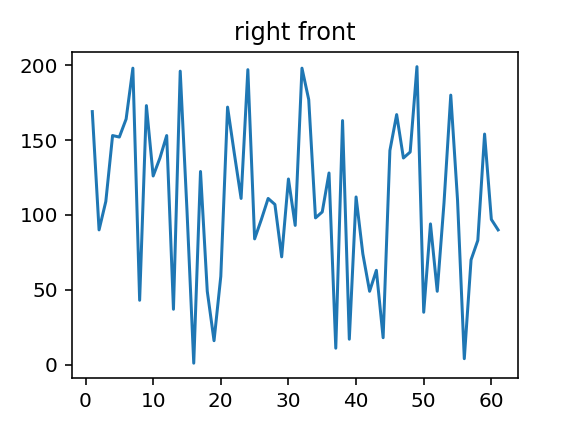
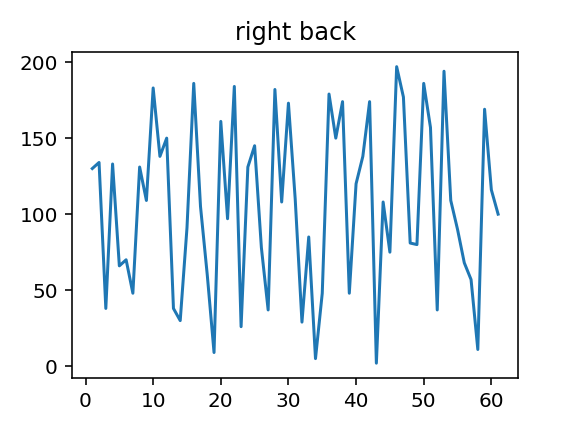
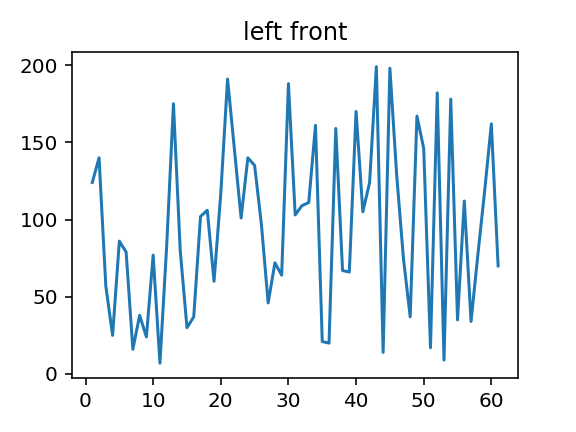
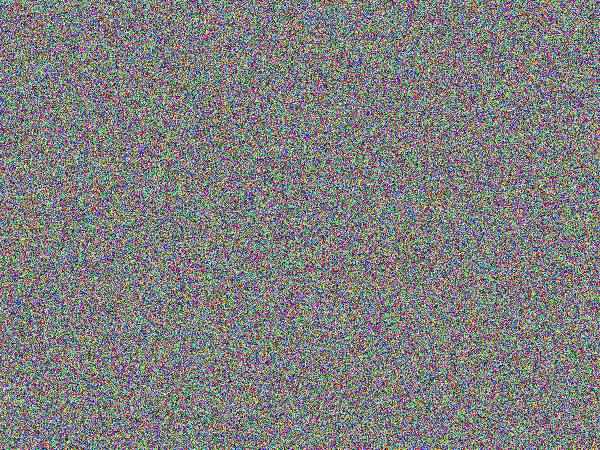
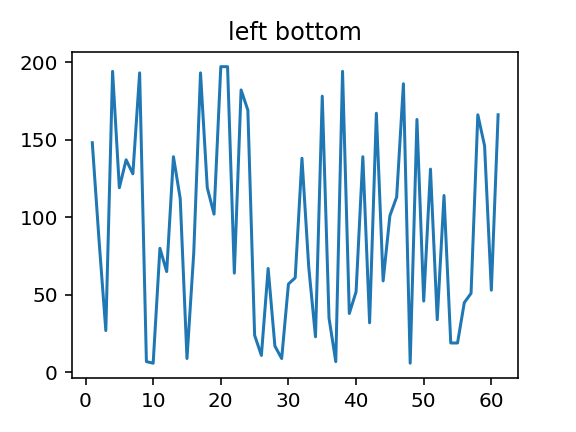
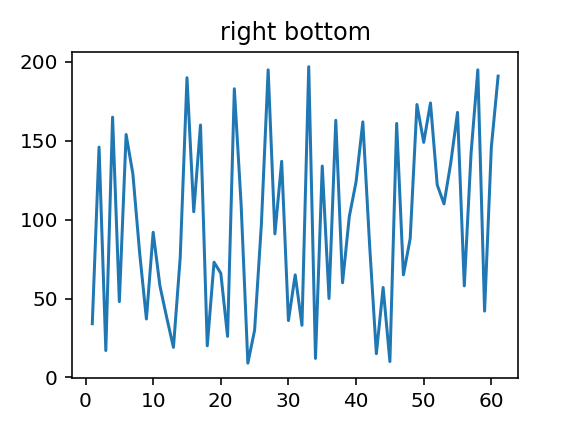
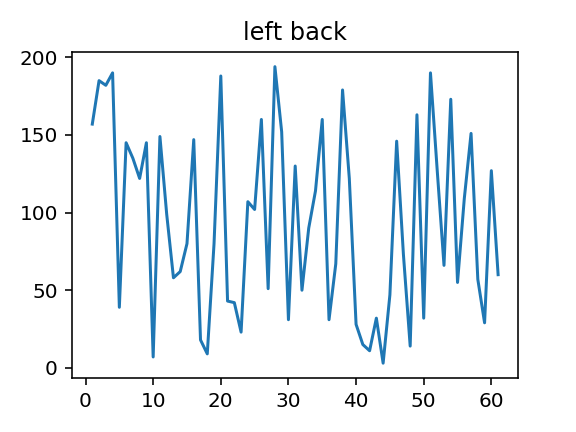

In [84]:
Dashboard

In [77]:
current_State.getButtonpressed()

Forward 0 times pressed
        Reverse 0 times pressed
        Left 0 times pressed
        Right 0 times pressed
        Rec 2 times pressed
        


In [64]:
current_State.getRecStat()

Rec 1 times pressed
        Records started = 0
        Records saved = 0


In [65]:
current_State.csv_current_name

In [66]:
current_State.current_pic_name

In [67]:
zumi.turn_right()

Zumi Turn Right
